# Classificadores (parte II)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import math
from collections import Counter

### Questão 1

<b> Rede MLP para classificação </b>

    i. Apenas uma camada oculta (recebe o tamanho dessa camada como parâmetro)

    ii. Pode assumir que tem apenas um neurônio de saída

In [2]:
class MLP():
    def __init__(self, input_layer_size, hidden_layer_size = 1):
        self.input_layer_size = input_layer_size
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = 1
        
        # Inicializando randomicamente os pesos das camadas ocultas e de saída
        self.w1 = np.random.randn(self.hidden_layer_size, self.input_layer_size)
        self.w2 = np.random.randn(self.output_layer_size, self.hidden_layer_size)
        
        self.b1 = np.random.randn(self.hidden_layer_size, )
        self.b2 = np.random.randn(self.output_layer_size, )
    
    # Função logística
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    # Derivada da função logística
    def sigmoid_d(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    # Treino de um sample atualizando os pesos e os valores de bias
    def fit_sample(self, x, y, alpha, n):
        grad_w1, grad_w2, grad_b1, grad_b2 = self.gradiente_step(x, y)
        
        self.w1 += (-alpha/n) * grad_w1
        self.w2 += (-alpha/n) * grad_w2
        
        self.b1 += (-alpha/n) * grad_b1
        self.b2 += (-alpha/n) * grad_b2
        
    # Calcular o gradiente
    def gradiente_step(self, x, y):
        weighted_hidden = np.dot(self.w1, x) + self.b1
        act_hidden = self.sigmoid(weighted_hidden)
        weighted_output = np.dot(self.w2, act_hidden) + self.b2
        act_output = self.sigmoid(weighted_output)
        
        e_residual = (act_output - y) * self.sigmoid_d(weighted_output)
        grad_w2 = np.array([e_residual]).T @ np.array([act_hidden])
        grad_b2 = e_residual
        
        e_residual = np.dot(self.w2.T, e_residual) * self.sigmoid_d(weighted_hidden)
        grad_w1 = np.array([e_residual]).T @ np.array([x])
        grad_b1 = e_residual
        
        return grad_w1, grad_w2, grad_b1, grad_b2
        
    def fit(self, x, y, epochs=100, alpha=10, print_acc_per_epochs=False):
        for epoch in range(epochs):
            for x_val, y_val in zip(x, y):
                self.fit_sample(x_val, y_val, alpha, len(x))
            
            if print_acc_per_epochs:
                y_pred = self.predict(x)
                acc = self.acuracia(y, y_pred)
                print("Época {} -- acurácia: {}".format(epoch+1, acc))
    
    # Predict de um sample
    def predict_sample(self, x):
        weighted_hidden = np.dot(self.w1, x) + self.b1
        act_hidden = self.sigmoid(weighted_hidden)
        weighted_output = np.dot(self.w2, act_hidden) + self.b2
        act_output = self.sigmoid(weighted_output)
        
        return act_output
    
    def predict(self, x):
        results = [self.predict_sample(x_val) for x_val in x]
        return np.array([(1. if z >= 0.5 else 0.) for z in results])
    
    def acuracia(self, y_true, y_pred):
        acc = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_true[i]:
                acc += 1
        return acc/len(y_pred)

<b> KNN </b>

    i. Recebe k como parâmetro

In [3]:
class KNN():
    def __init__(self, k=5):
        self.k = k
    
    def distancia_euclidiana(self, r, s):
        distancia = 0
        for i in range(len(s)):
            distancia += math.pow(r[i] - s[i], 2)
        
        return math.sqrt(distancia)
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        predictions = []
        for x in x_test:
            y = self.closest(x)
            predictions.append(y)

        return np.array(predictions)

    def closest(self, inst_test):
        distances = []
        
        # Calcular a distância da nova instância em relação as outras e salvar na lista 'distances'
        # Armazena, na lista de distancias, tuplas contendo o índice da instância de treino e a distância para a nova instância
        for i in range(len(self.x_train)):
            distances.append((i, self.distancia_euclidiana(inst_test, self.x_train[i])))
        
        # Ordenar as distâncias calculadas e pega as k instâncias mais próximas
        distances = sorted(distances, key=lambda x: x[1])[0:self.k]
        
        # Pegar os k índices das instâncias de treino
        k_i = [distances[i][0] for i in range(self.k)]
        
        # Pegar as labels que correspondem aos índices em k_i
        k_y = [self.y_train[k_i[i]] for i in range(self.k)]
        
        # Contar a quantidade de cada label em k_labels
        # O most_common retorna uma lista dos n elementos mais comuns e suas contagens, do mais comum ao menos.
        # Então, retornamos somente os elementos (as labels)
        c = Counter(k_y)
    
        return c.most_common()[0][0]

### Questão 2 

Funções *acurácia*, *plot_confusion_matrix* e *plot_boundaries* do trabalho passado

In [4]:
def acuracia(y_true, y_pred):
    acc = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            acc += 1
    return acc/len(y_pred)

In [5]:
def plot_confusion_matrix(X, y, clf):
    y_pred = clf.predict(X)
    
    cm = confusion_matrix(y, y_pred)
    
    index = ["0.", "1."]
    columns = ["0.", "1."]
    
    cm_df = pd.DataFrame(cm, columns, index)
    
    plt.figure(figsize=(8,8))
    
    ax = sns.heatmap(cm_df, annot=True, cmap=plt.cm.Reds)
    ax.set(xlabel="Valores preditos", ylabel="Valores reais")

In [6]:
def plot_boundaries(X, y, clf):
    
    # Traçar a fronteira de decisão. Para isso, atribuiremos uma cor a cada
    # ponto na malha [x_min, x_max] x [y_min, y_max].
    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5

    #Tamanho da etapa na malha
    h = .02

    #Retornando matrizes de coordenadas a partir de vetores de coordenadas.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    #Valores preditos
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #Colocando o resultado em um gráfico de cores
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 10))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Spectral)

    #Plotando os pontos
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

### Questão 3

Implementar função k_fold(X, y, k, metodo) que execute a validação cruzada k-fold sobre o conjunto de dados X, y usando o método método reportanto o erro usando função acurácia (usar k=5). Não precisa implementar parte de validação e teste, implementar somente o fluxo principal (como está no primeiro slide sobre k-fold) 

In [7]:
def k_fold(x, y, k, metodo):
    
    # Determinar o tamanho de um fold
    n_fold = int(len(x) / k)
    
    # Dicionário para guardar o valor da acurácia a cada iteração de k
    erro = []
    
    for i in range(k):
        # Dividir os dados em conjunto de treino e conjunto de teste de acordo com o tamanho do fold
        
        # Dado que o total de instâncias é 100, então cada fold terá 20 instâncias no teste e 
        # 80 instâncias irão compor o conjunto de treino, em cada k
        
        x_test = x[(i * n_fold):((i+1) * n_fold)]
        y_test = y[(i * n_fold):((i+1) * n_fold)]
        
        x_train = np.concatenate((x[:(i*n_fold)], x[((i+1)*n_fold):]), axis=0)
        y_train = np.concatenate((y[:(i*n_fold)], y[((i+1)*n_fold):]), axis=0)             

        # Usando o método passado por parâmetro 
        metodo.fit(x_train, y_train)
        y_pred = metodo.predict(x_test)
        
        # Usando a função acurácia
        acc = acuracia(y_test, y_pred)
        erro.append(acc)
        
    # Retorna a média dos erros
    return sum(erro)/len(erro)

### Carregar o conjunto de dados

In [8]:
dados = np.loadtxt('data1.txt', delimiter=',')
dados[:3]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ]])

### Separando as características e a variável alvo

In [9]:
x = dados[:, :-1]
y = dados[:, -1]

In [10]:
x[:3]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803]])

In [11]:
np.unique(y)

array([0., 1.])

### Normalizando os dados

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x)

x = scaler.transform(x)   

In [13]:
x[:3]

array([[-1.60224763,  0.63834112],
       [-1.82625564, -1.2075414 ],
       [-1.53903969,  0.3612943 ]])

In [14]:
len(x)

100

### Reporte o que se pede

Usando os métodos KNN (com k = 1, 2 e 3) e MLP (como número de neurônios na camada oculta 2,3 e 4)

<b> a. O erro do 5-fold </b>

In [15]:
# KNN
knn_1 = KNN(k=1)
knn_2 = KNN(k=2)
knn_3 = KNN(k=3)

print("Erro 5-fold KNN (k = 1): ", k_fold(x, y, 5, knn_1))
print("Erro 5-fold KNN (k = 2): ", k_fold(x, y, 5, knn_2))
print("Erro 5-fold KNN (k = 3): ", k_fold(x, y, 5, knn_3))

Erro 5-fold KNN (k = 1):  0.9200000000000002
Erro 5-fold KNN (k = 2):  0.9200000000000002
Erro 5-fold KNN (k = 3):  0.85


In [16]:
# MLP
mlp_2_o = MLP(input_layer_size=2, hidden_layer_size=2)
mlp_3_o = MLP(input_layer_size=2, hidden_layer_size=3)
mlp_4_o = MLP(input_layer_size=2, hidden_layer_size=4)

print("Erro 5-fold MLP (neurônios na camada oculta = 2): ", k_fold(x, y, 5, mlp_2_o))
print("Erro 5-fold MLP (neurônios na camada oculta = 3): ", k_fold(x, y, 5, mlp_3_o))
print("Erro 5-fold MLP (neurônios na camada oculta = 4): ", k_fold(x, y, 5, mlp_4_o))

Erro 5-fold MLP (neurônios na camada oculta = 2):  0.9099999999999999
Erro 5-fold MLP (neurônios na camada oculta = 3):  0.9400000000000001
Erro 5-fold MLP (neurônios na camada oculta = 4):  0.9400000000000001


<b> b. O dado em um gráfico de dispersão com as fronteiras de
separação produzidas pelo método treinado com o
conjunto de dados inteiro </b> 

#### MLP

In [17]:
mlp = MLP(input_layer_size=2)
mlp.fit(x, y, alpha=10, epochs=200)
y_pred_mlp = mlp.predict(x)
acc_mlp = acuracia(y, y_pred_mlp)

print("Acurácia MLP: {}%".format(acc_mlp * 100))

Acurácia MLP: 91.0%


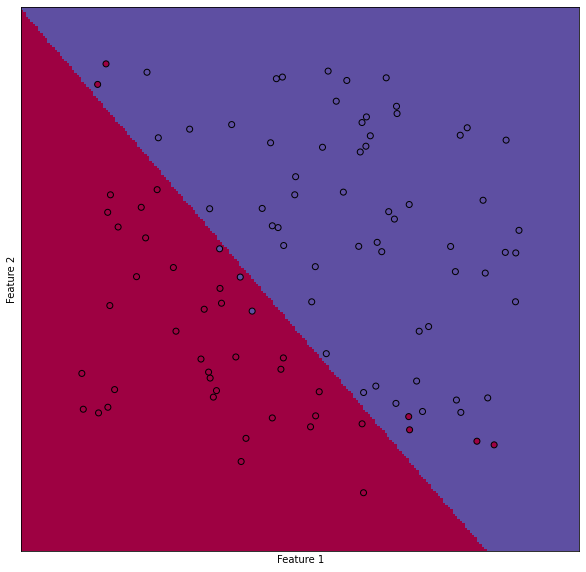

In [18]:
#MLP
plot_boundaries(x, y, mlp)

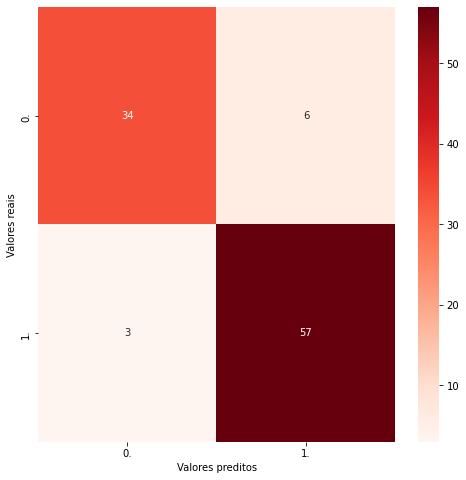

In [19]:
# Matriz de confusão
plot_confusion_matrix(x, y, mlp)

#### KNN

In [20]:
knn = KNN()
y_pred_knn = []
knn.fit(x, y)
y_pred_knn = knn.predict(x)
acc_knn = acuracia(y, y_pred_knn)

print("Acurácia KNN: {}%".format(acc_knn * 100))

Acurácia KNN: 92.0%


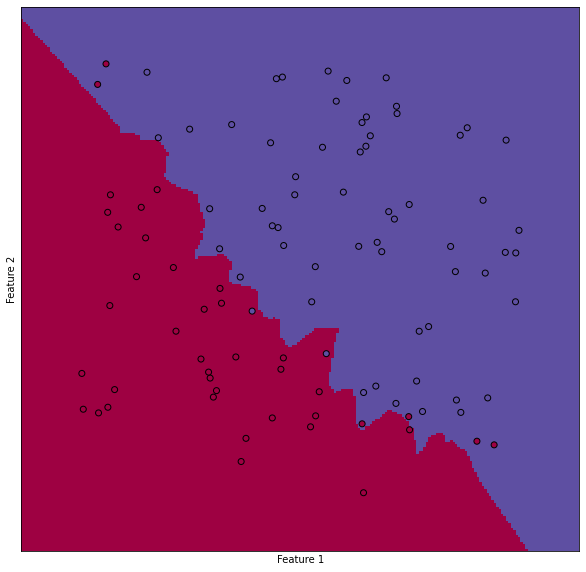

In [21]:
#KNN
plot_boundaries(x, y, knn)

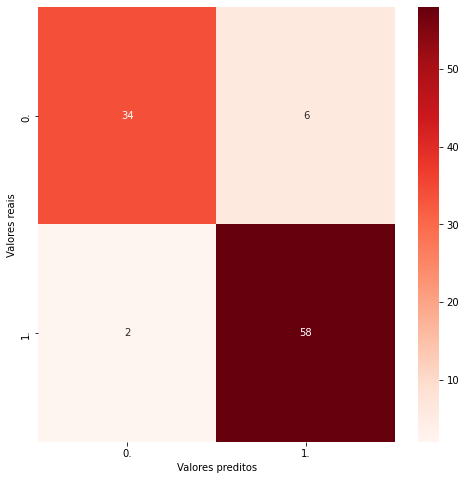

In [22]:
# Matriz de confusão
plot_confusion_matrix(x, y, knn)